<center>Заметка 1.5  Базовые понятия машинного обучения, регрессия.</center>
<center>курса <q>Введение в машинное обучение</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.11</center>

<center>Анотация</center>
<p>
Вводятся базовые элементы пакета линейной алгебры (Numpy) относфщейся к питону (Python версии 3.xx). Конкретно речь идет о алгебре и, соотвествено, линейной регресии.
Последнее, в частности, используется для ввода ключевых понятий из машинного обучения: выборка, обучающее множество, тестовое/валидационное множество, поиск "оптимального" решения и регуляризация. Уровни значимости (F-статистика) при построении регрессий (statmodels). 
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<b>Отрисовка кривой</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Для начала случайно сгенерируем точки в которых будет вычислена функция.
np.random.uniform(10, 20, 5)  # Создаем матрицу равномерных распределений. Первые два числа казывают диапазон.

array([ 15.67466916,  18.28292868,  18.10875432,  18.36228257,  15.97191687])

In [3]:
x = np.random.uniform( 3, 10, 10 ) # 10 точек на отрезке [3, 10]

In [4]:
x

array([ 7.05202776,  9.79270071,  5.77494635,  7.41327033,  5.18834511,
        3.95761252,  7.57585745,  8.89513112,  8.33575729,  5.47861205])

In [5]:
x.shape # Это действительно массив из 10 чисел.

(10,)

In [6]:
y = x * 2 - 15 # Вычисляем значение в каждой из точек. Функция линейная.

In [7]:
y

array([-0.89594448,  4.58540141, -3.45010729, -0.17345933, -4.62330978,
       -7.08477496,  0.1517149 ,  2.79026224,  1.67151458, -4.0427759 ])

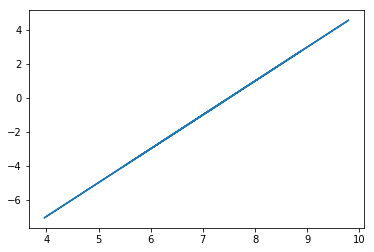

In [8]:
plt.plot( x, y )

In [9]:
yy = y + np.random.randn(10) # Добавим шум к каждому значению (измерению)

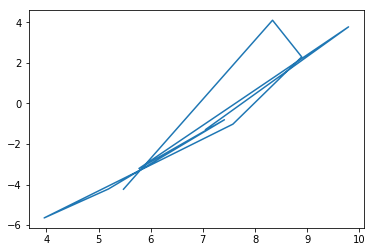

In [10]:
plt.plot( x, yy ) # Кривая как-то странно выглядит.

In [11]:
xx = np.sort( x ) # Дело в том, что необходимо отсортировать числа по оси x.
yy = xx * 2 - 15 + np.random.randn(10) # Теперь заново вычисляем.

In [12]:
yy.shape, x.shape # Массивы соответсвуют друг другу по размеру.

((10,), (10,))

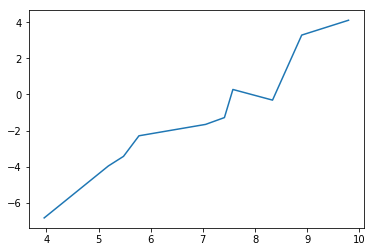

In [13]:
plt.plot( xx, yy )

<b>Линейные уравнения.</b>

In [14]:
# Решаем систему уравнений.
a = np.array( [ [2, -1], [1, 3] ] ) # 2x  -y = 9
b = np.array( [ 9, 8] ) #             1x +3y = 8
x = np.linalg.solve(a, b)
x

array([ 5.,  1.])

In [15]:
np.allclose(np.dot(a, x), b) # Проверяем на равенство с учетом машинного эпсилон, т.е. числа могуть чуть отличаться.

True

In [16]:
5 - np.sqrt( 5 ) ** 2 # Например, должны были получить 0, но жизнь иначе распорядилась.

-8.8817841970012523e-16

In [17]:
# Можно вычислить и обратную матрицу в явном виде
# a = np.array( [ [2, -1], [1, 3] ] )
ainv = np.linalg.inv( a )
ainv

array([[ 0.42857143,  0.14285714],
       [-0.14285714,  0.28571429]])

In [18]:
# Решаем систему. Для этого используем произведение вектора на матрицу:
ainv.dot( b ) # Получили тот же ответ, что и раньше.

array([ 5.,  1.])

In [19]:
# Можно умножить и на матрицу. Тогда произведение матрицы на её обратное должно дать единичную.
np.allclose( np.dot(a, ainv), np.eye(2) )

True

<b>Линейная регрессия</b>

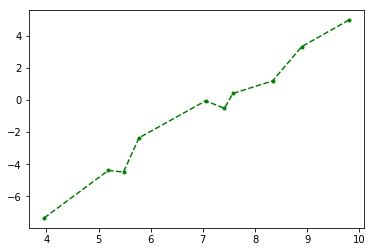

In [20]:
yy = xx * 2 - 15 + np.random.randn(10)/2 # Тоже самое но с меньшим шумом.
plt.plot( xx, yy, 'g.--') # Цвет зеленый, соединения пунктиром, точки маленькие.

In [21]:
q=xx.reshape(10,1) # Превращяем массив в вектор столбец, т.е. массив массивов (из одного элемента).
q

array([[ 3.95761252],
       [ 5.18834511],
       [ 5.47861205],
       [ 5.77494635],
       [ 7.05202776],
       [ 7.41327033],
       [ 7.57585745],
       [ 8.33575729],
       [ 8.89513112],
       [ 9.79270071]])

In [22]:
np.ones(10).reshape(10,1) # Создаем вектор столбец единиц.

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [23]:
A = np.concatenate( [np.ones((10,1)), q ], axis=1 ) # Создаем общую матрицу. Присваеваем её переменной A.
A

array([[ 1.        ,  3.95761252],
       [ 1.        ,  5.18834511],
       [ 1.        ,  5.47861205],
       [ 1.        ,  5.77494635],
       [ 1.        ,  7.05202776],
       [ 1.        ,  7.41327033],
       [ 1.        ,  7.57585745],
       [ 1.        ,  8.33575729],
       [ 1.        ,  8.89513112],
       [ 1.        ,  9.79270071]])

In [24]:
xx

array([ 3.95761252,  5.18834511,  5.47861205,  5.77494635,  7.05202776,
        7.41327033,  7.57585745,  8.33575729,  8.89513112,  9.79270071])

In [25]:
AA = np.linalg.pinv(A) # Вычисляем псевдо обратную матрицу от A. Метод решения обычных систем не годится.
AA

array([[ 0.79193827,  0.50701217,  0.43981266,  0.3712085 ,  0.07555222,
        -0.00807881, -0.04571925, -0.22164316, -0.35114343, -0.55893918],
       [-0.09961069, -0.05859303, -0.04891906, -0.03904288,  0.00351948,
         0.01555891,  0.02097759,  0.0463034 ,  0.06494612,  0.09486017]])

In [26]:
d = AA.dot( yy.reshape(10,1) ) # Теперь её используем для решения системы.
d # В общем параметры приблизительно правельные.

array([[-15.10459342],
       [  2.04079326]])

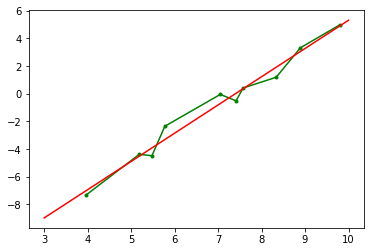

In [27]:
p = np.linspace(3, 10, 100) # Отрисуем получившуюся прямую. Используем для этого 100 точек.
yyy = p*d[1] + d[0] # Параметры вычисленной линии хранятся в переменной d.
plt.plot( xx, yy, 'g.-', p, yyy, 'r-')

In [28]:
# Какая точность этого приближения?
xx[0]*d[1] + d[0], yy[0] # В даннойт точк значения вычисленные и табулированые:

(array([-7.02792448]), -7.3409006983574017)

In [29]:
(xx[0]*d[1] + d[0])[0], yy[0]

(-7.0279244819415521, -7.3409006983574017)

In [30]:
for i in range(xx.shape[0]): # Цикл пробегает по всем нашим точкам
    print ( xx[i]*d[1] + d[0], yy[i] ) # Выводит два значения: вычисленное и табулированное.

[-7.02792448] -7.34090069836
[-4.51625371] -4.38632260693
[-3.92387889] -4.48702847187
[-3.31912185] -2.35951798385
[-0.71286273] -0.0551649228037
[ 0.02435868] -0.520917962209
[ 0.35616537] 0.405968411281
[ 1.90696384] 1.18311278445
[ 3.04853018] 3.31718580105
[ 4.88028414] 4.95984619057


In [31]:
xx.shape[0], len(xx) 

(10, 10)

In [32]:
def evalLine(d, x): # Создадим функцию, которая по параметрам прямой (d) считаем значение в точке (x).
    return x * d[1] + d[0]

In [33]:
evalLine( d, xx[0]) # Вычислим значение в точке.
# Значение согласуется с предыдущими результатами.

array([-7.02792448])

In [34]:
# Посчитаем среднею ошибку по всем точкам.
sum1 = 0. # Линейная ошибка.
sum2 = 0. # Квадратичная ошибка.
for i in range(xx.shape[0]):
    err = evalLine( d, xx[i]) - yy[i]
    sum1 += err
    sum2 += err * err
    print ( xx[i]*d[1] + d[0], err )
print( "integral sum = ", sum1/xx.shape[0], sum2/xx.shape[0] )

[-7.02792448] [ 0.31297622]
[-4.51625371] [-0.12993111]
[-3.92387889] [ 0.56314958]
[-3.31912185] [-0.95960387]
[-0.71286273] [-0.65769781]
[ 0.02435868] [ 0.54527664]
[ 0.35616537] [-0.04980304]
[ 1.90696384] [ 0.72385106]
[ 3.04853018] [-0.26865563]
[ 4.88028414] [-0.07956205]
integral sum =  [  9.49240686e-15] [ 0.26876529]


ДЗ1 Почему сумма ошибка почти равна нулю? 

In [35]:
# Обособим данный подсчет в функцию.
def errLine(d, x, y): # По параметрам прямой (d) и точкам (x,y) вычислим общую ошибку.
    sum1 = 0.
    sum2 = 0.
    for i in range(x.shape[0]):
        err = evalLine( d, x[i]) - y[i]
        sum1 += err
        sum2 += err * err
    return sum1/x.shape[0], sum2/x.shape[0]

In [36]:
errLine(d, xx, yy)

(array([  9.49240686e-15]), array([ 0.26876529]))

In [37]:
# Обособим код вычисляющий линейную регрессию в функцию.
def fitLin(x, y): # x, y задают данные. На выходе параметры линейной регрессии.
    sz = x.shape[0]
    A = np.concatenate( [np.ones((sz,1)), x.reshape( sz, 1) ], axis=1 )
    Ai=np.linalg.pinv(A)
    return Ai.dot( y.reshape(sz,1) )

In [38]:
d0 = fitLin( xx, yy) # Проверим, что соответсвует редыдущим результатам.
d0

array([[-15.10459342],
       [  2.04079326]])

In [39]:
errLine(d0, xx, yy)

(array([  9.49240686e-15]), array([ 0.26876529]))

<b>Learn and Test</b>

In [40]:
perm = np.random.permutation( xx.shape[0] ) # Создаем перестановку числе от 0 до xx.shape[0] не включительно.
perm

array([7, 0, 4, 2, 6, 1, 8, 3, 5, 9])

In [41]:
#np.random.randint(0, xx.shape[0], 5)
ii = perm[:5] # Берем первые 5 чисел.
ii

array([7, 0, 4, 2, 6])

In [42]:
d1 = fitLin( xx[ii], yy[ii]) # Вычисляем параметры линейной регрессии для подмножества числе (ii)
d1

array([[-15.51464655],
       [  2.07652765]])

In [43]:
ee = errLine(d1, xx[ii], yy[ii]) # Вычисляем ошибку на подмножестве.
ee

(array([  4.01900735e-15]), array([ 0.23980841]))

In [44]:
errLine(d1, xx, yy) # Вычисляем ошибку на всем множестве точек.

(array([-0.1618268]), array([ 0.29878468]))

In [45]:
def experimentLin(n, d, p, k ):
    x = np.random.uniform( 3, 10, (n) )
    y = d[1] * x + d[0] + np.random.randn( x.shape[0] )/2
    d0 = fitLin( x, y)
    e0 = errLine(d0, x, y)
    
    ee10 = np.array([0.])
    ee11 = np.array([0.])
    for j in range(k):
        perm = np.random.permutation( xx.shape[0] )
        ii = perm[:int(x.shape[0] * p)]#np.random.randint(0, x.shape[0], int(x.shape[0] * p) )
        d1 = fitLin( x[ii], y[ii])
        e1 = errLine(d1, x, y)
        ee10 += e1[0]
        ee11 += e1[1]
    print( e0, [ee10 / k, ee11 / k] )

In [46]:
experimentLin(10, np.array([-15, 2.5]), 0.85, 1000)

(array([  9.10382880e-16]), array([ 0.2860255])) [array([-0.00206034]), array([ 0.3058313])]


ДЗ2: Построить статистику для ошибки. Вычислить её аналетически. 

<b>Polynomial</b>

In [47]:
# Рассмотрим случай полиномов. Тонее на них мы изучим другое важное поянтие машинного обучения. Регулиризация.
import numpy.polynomial.polynomial as poly

In [48]:
poly.polyval(xx[0], d ) # Оказывается есть функция poly.polyval которая умеет вычилсять значение полинома.

array([-7.02792448])

In [49]:
xx.shape[0]

10

In [50]:
x.shape[0]

2

In [51]:
ee[0]

array([  4.01900735e-15])

In [52]:
d = np.array( [-10, -28, 2.2] ) # Параметры задающие параболу.

In [53]:
n = 10
x = np.random.uniform( 3, 10, (n) )
x = np.sort( x )
x

array([ 3.47834982,  4.03176916,  6.03270878,  6.72151425,  6.80949554,
        7.04328037,  8.01912289,  8.24238458,  8.61194197,  8.62689496])

In [54]:
y = poly.polyval(x, d ) + np.random.randn( x.shape[0] )/2

In [55]:
y

array([-80.86527052, -86.977289  , -99.66530678, -98.47136606,
       -99.08501546, -97.94923418, -93.44716969, -91.25217314,
       -88.24214953, -88.26970171])

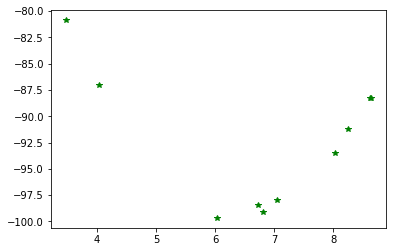

In [56]:
plt.plot( x, y, 'g*')

In [57]:
dd = poly.polyfit( x, y, x.shape[0] - 2 ) # Есть библиотечная функция для вычисления полиномиальной регрессии.
dd

array([ -1.71997820e+06,   2.32906994e+06,  -1.35544916e+06,
         4.43363787e+05,  -8.92748292e+04,   1.13463179e+04,
        -8.89921784e+02,   3.94239405e+01,  -7.55964021e-01])

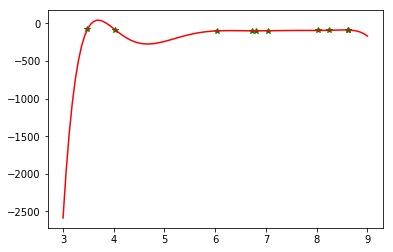

In [58]:
p = np.linspace(3, 9, 100) # Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )

In [59]:
q = x.reshape( n, 1) # Решим эту же задачу вручную.
q

array([[ 3.47834982],
       [ 4.03176916],
       [ 6.03270878],
       [ 6.72151425],
       [ 6.80949554],
       [ 7.04328037],
       [ 8.01912289],
       [ 8.24238458],
       [ 8.61194197],
       [ 8.62689496]])

In [60]:
q**2

array([[ 12.09891749],
       [ 16.25516255],
       [ 36.39357526],
       [ 45.17875388],
       [ 46.3692295 ],
       [ 49.60779841],
       [ 64.30633191],
       [ 67.93690352],
       [ 74.16554446],
       [ 74.42331667]])

In [61]:
A = np.concatenate( [np.ones((n,1)), q, q**2, q**3, q**4, q**5, q**6, q**7, q**8], axis=1 )

In [62]:
Ai = np.linalg.pinv( A )
dd = Ai.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd #, dd.shape
#print( A.shape, Ai.shape, n )

array([ -1.70288160e+06,   2.30591979e+06,  -1.34197797e+06,
         4.38958090e+05,  -8.83879005e+04,   1.12336264e+04,
        -8.81086207e+02,   3.90326847e+01,  -7.48465230e-01])

In [63]:
AA = A.transpose().dot( A )
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
#print( A.shape, AAinv.shape, AApinv.shape )
dd = AApinv.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd, dd.shape

(array([  7.24703812e+03,  -8.37581723e+03,   3.93750061e+03,
         -9.37298076e+02,   1.07468287e+02,  -1.91907329e+00,
         -8.80385467e-01,   8.94389862e-02,  -2.76982599e-03]), (9,))

In [64]:
AApinv2, residuals, rank, s= np.linalg.lstsq( A, y )
AApinv2

array([ -1.70288160e+06,   2.30591979e+06,  -1.34197797e+06,
         4.38958090e+05,  -8.83879005e+04,   1.12336264e+04,
        -8.81086207e+02,   3.90326847e+01,  -7.48465230e-01])

In [65]:
residuals, rank # Сумма ошибок отклонения. И ранг.

(array([ 0.17637098]), 9)

In [66]:
s # Собственные значения.

array([  5.21501783e+07,   3.01963545e+05,   4.25405037e+03,
         1.58479343e+02,   7.26535103e+00,   3.43663974e-01,
         7.98546540e-03,   7.57704685e-05,   1.31232157e-07])

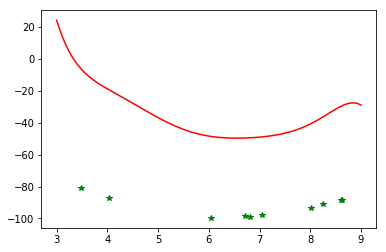

In [67]:
p = np.linspace(3, 9, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )
# Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

In [68]:
AA = A.transpose().dot( A )
AA = AA  + 1.5 * np.eye( AA.shape[0] ) # Добавляем регулиризацию.
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
#print( A.shape, AAinv.shape, AApinv.shape )
dd = AApinv.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd, dd.shape

(array([ -4.10958000e-01,  -9.19474385e-01,  -1.72373982e+00,
         -2.36277145e+00,  -1.49156877e+00,   1.11008151e+00,
         -2.34796585e-01,   2.11459966e-02,  -7.04961682e-04]), (9,))

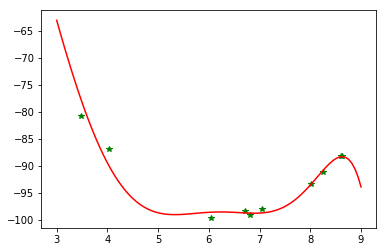

In [69]:
p = np.linspace(3, 9, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )

In [70]:
AA = A.transpose().dot( A )
U, s, V = np.linalg.svd( AA )
s # Собственые значения. Очень большой порядок их изменения.

array([  2.71964110e+15,   9.11819827e+10,   1.80969446e+07,
         2.51157021e+04,   5.27853340e+01,   1.18104131e-01,
         5.89706167e-05,   8.05661432e-06,   2.95773370e-07])

In [71]:
s[0]/s[-1] # Собственные значения отсортированы. Делим наибольшее на наименьшее.

9.195016790202636e+21

In [72]:
AA = AA  + 1.5 * np.eye( AA.shape[0] )
U, s, V = np.linalg.svd( AA )
s

array([  2.71964110e+15,   9.11819827e+10,   1.80969461e+07,
         2.51172021e+04,   5.42853214e+01,   1.61810820e+00,
         1.50004939e+00,   1.50002087e+00,   1.49999303e+00])

In [73]:
s[0]/s[-1] # Порядок существенно уменьшен, хотя всеравно большой. np.trace?linalg.norm

1813102494921668.5

In [74]:
a = np.array( [ [1, -2], [1, -2] ] )
U, s, V = np.linalg.svd(a, full_matrices=True)
U.shape, V.shape, s.shape

((2, 2), (2, 2), (2,))

In [75]:
print( U )
print( V )
print( s )

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]
[  3.16227766e+00   4.24340278e-17]


In [76]:
S = np.diag( s )

In [77]:
np.allclose(a, np.dot(U, np.dot(S, V)))

True

<b>Произведение векторов</b>

In [78]:
# Скаляроне произведение.
a = np.array([ 1, 2, 3])
b = np.array([ -1, 0, 2])
np.inner( a, b) # Скяларное произведение

5

In [79]:
a * b # Поэлементное произведение векторов.

array([-1,  0,  6])

In [80]:
np.sum( a * b ) # Но можно и так.

5

In [81]:
b

array([-1,  0,  2])

In [82]:
# Комплексные числа.
1 + 2j

(1+2j)

In [83]:
(1 + 2j) * (3 + 4j) # 1*3 + 1*4j + 2j*3 + 2j*4j = 3 + 4j + 6j + 8jj = -5 + 10j

(-5+10j)

In [84]:
# Сопряженное скалярное произведение.
a = np.array([ 1 + 2j, 3 + 4j])
b = np.array([ 1 - 2j, 3 + 4j])
np.vdot(a, b)

(22-4j)

<b>statmodels</b>

In [85]:
import statsmodels.api as sm
import statsmodels.sandbox.regression.predstd as predstd

/data/conda/anaconda3/envs/data_analysis/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [86]:
nsample = 100
x = np.linspace(-5, 5, 100)
X = np.column_stack((x, x, x**2)) # Отмечу, что переменная x повторена. т.е. есть избыток в данных.
beta = np.array([1, 0.05, 0.05, 0.5])
e = np.random.normal(size=nsample)

In [87]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [88]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     910.8
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.36e-63
Time:                        08:17:21   Log-Likelihood:                -129.21
No. Observations:                 100   AIC:                             264.4
Df Residuals:                      97   BIC:                             272.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9485      0.134      7.070      0.0

In [89]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 0.94847993  0.02719456  0.02719456  0.50163326]
R2:  0.949444584224


In [90]:
yy = np.dot( X, results.params)

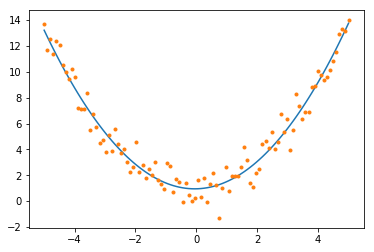

In [91]:
plt.plot( x, yy)
plt.plot( x, y, ".")

In [92]:
results = sm.OLS(y, sm.add_constant(x)).fit() # Все внимание на F-statistic, Porb(...), R-squared.
print(results.summary()) #  Они показывают, что мы плохо приблизили. "Слуйчайная прямая" дала бы схожий результат.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1609
Date:                Fri, 27 Apr 2018   Prob (F-statistic):              0.689
Time:                        08:17:21   Log-Likelihood:                -278.36
No. Observations:                 100   AIC:                             560.7
Df Residuals:                      98   BIC:                             565.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2132      0.395     13.184      0.0

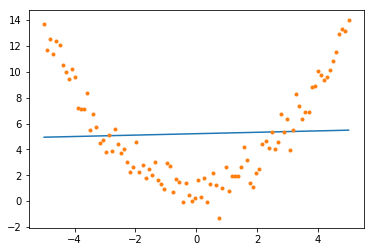

In [93]:
yy = np.dot( sm.add_constant(x), results.params)
plt.plot( x, yy)
plt.plot( x, y, ".")

<b>Доверительный интервал</b>

In [94]:
model = sm.OLS(y, X) # Возвращаеся к прошлой модели.
results = model.fit()
yy = np.dot( X, results.params)

prstd, iv_l, iv_u = predstd.wls_prediction_std( results )

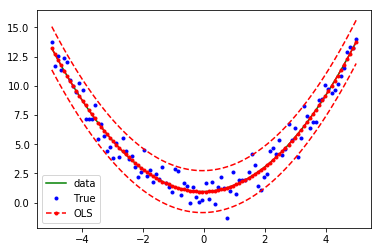

In [95]:
plt.plot(x, yy, 'g-', label="data")
plt.plot(x, y, 'b.', label="True")
plt.plot(x, results.fittedvalues, 'r--.', label="OLS")
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')
plt.legend(loc='best');

In [96]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(results.f_test(R)) # т.е. нестоит отбрасывать гипотезу о том, что 2 и 3 параметр идентичны.

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[ 2.19218276]]), p=0.1171753372118007, df_denom=97, df_num=2>


In [97]:
R = [[1, 0, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(results.f_test(R)) # первая переменная и предпоследняя явно разные.

[[1 0 0 0]
 [0 0 1 0]]
<F test: F=array([[ 26.56131739]]), p=6.321053651784474e-10, df_denom=97, df_num=2>
